# 4.3 HarvardX PH526x Using Python for Research
## 4.3 Introduction to Network Analysis
- Learn about the basic components of <strong>networks</strong> and the <strong>graphs</strong> that represent them
- Learn basic network concepts such as <strong>neighbor, degree, path, component, and largest connected component</strong>  
  
Many systems of scientific and societal interest consist of a large number of interacting components. The structure of these systems can be represented as networks where network nodes represent the components, and network edges, the interactions between the components.  
Network analysis can be used to study how pathogens, behaviors, and information spread in social networks,having important implications for our understanding of epidemics and the planning of effective interventions.  
In a biological context, at a molecular level, network analysis can be applied to gene regulation networks, signal transduction networks, protein interaction networks, and much, much more.  
  
This case study first introduces some basic concepts about networks, we'll then write a Python function to generate very simple random graphs, and finally, we'll analyze some basic properties of social networks collected in different rural villages in India.  
  
If you wanted to be strict with terminology, we should really distinguish between the terms network and graph. Network refers to the real world object, such as a road network, whereas a graph refers to its abstract mathematical representation. It's useful to be aware of this distinction, but we'll be using these terms, networks and graph interchangeably.  
  
Let's first define some basic network concepts. Graphs consist of nodes, also called vertices, and links, also called edges.
Mathematically, a graph is a collection of vertices and edges where each edge corresponds to a pair of vertices. When we visualize graphs, we typically draw vertices as circles and edges as lines connecting the circles.  
    
![title](images/network.PNG)  

1,2,3,4,5 are vertex (nodes?)  
edge between vertices (line between 1 and 2)  
Two connected vertices are said to be neighbors ( 1 and 2)  
degree of a vertex is the number of entries connected to it (degree of 1 is one and degree of 2 is three(lines))  
A path is unique vertices, such as two vertices connected by an edge (lines between 1,2 and 3)  
1 and 2 are connected and 2 and 3 are connected  
The length of the path is defined as the number of edges in that path.  
So the length of the path for node 1 to node 3 is equal to 2  
length of path from 1 to 5 would be 3  
  
  
A graph is said to be connected if every vertex is reachable from every other vertex, that is, if there is a path from every vertex to every other vertex.  
  
If a graph is not connected, it is said to be disconnected.  (6 and 7)   
  
We might have vertex 6 and 7 here, and they might be connected to one another, but neither of the two is connected the rest of the graph. That's why, in its entirety, this graph is disconnected. If a graph is disconnected, it breaks apart naturally
into pieces, or components. Any component is connected when considered on its own, but there are no edges between the nodes that belong to different components. In this case, we have two components.  
  
The size of a component is defined as the number of nodes in the component. If there are several components in a graph, the largest component, the one having the greatest number of nodes, is called the largest connected component.

#### Introduction to Network Analysis: Question 1
What is a path in a network?  
- An Edge
- A generalized edge that connects distant nodes
- A sequence of edges connecting two nodes  
  
ANSWER: A sequence of edges connecting two nodes  
  
#### Introduction to Network Analysis: Question 2
What is a connected component in a network?
- A group of nodes and their edges for which a path exists between each node in the component
- Any subgroup of nodes
- The set of either nodes or edges in the network
  
ANSWER: A group of nodes and their edges for which a path exists between each node in the component

### Basics of NetworkX
- Learn how to use the NetworkX module to create and manipulate network graphs
  
Networks are created and manipulated using the NetworkX module.

In [9]:
import networkx as nx
G = nx.Graph()

And now we have an empty graph called G. We can now add nodes one at a time or several at a time. We can also get a list of the current nodes.

In [10]:
G.add_node(1)

We can also add multiple nodes at the same time. In that case, we'll use add_nodes_from, and the input argument
has to be a list containing all of the nodes that we would like to add to our graph.  
  
One important point to realize is that the node labels don't necessarily have to be numbers. For example, we can use strings.
So we could add a node called u, and we would also add a node called v.

In [11]:
G.add_nodes_from([2,3])

In [13]:
G.add_nodes_from(["u","v"])

If we would like to know what are the nodes in our graph,

In [14]:
G.nodes()

[1, 2, 3, 'u', 'v']

Similar functions exist also for adding edges. Remember that edges are treated as pairs of nodes.  
G.add_edge takes in two arguments.

In [ ]:
G.add_edge(1,2)

In [15]:
G.add_edge("u","v")

We can also add multiple edges at the same time.  
The input argument is going to be a list, which consists of several tuples, each tuple corresponding to an edge.

In [16]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

We can add an edge even if the underlying nodes don't already exist as part of the graph. In that case, Python adds those nodes in automatically.

In [18]:
G.add_edge("u","w")

In [19]:
G.edges()

[(1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')]

We can also remove nodes and edges from our graph.

In [20]:
G.remove_node(2)

In [21]:
G.nodes()

[1, 3, 'u', 'v', 4, 5, 6, 'w']

We can also remove multiple nodes at the same time.
In that case, we'll be using the remove_nodes_from method.
The input argument or input object is again
the list, which consists of the nodes that we would like to remove.

In [22]:
G.remove_nodes_from([4,5])

In [23]:
G.nodes()

[1, 3, 'u', 'v', 6, 'w']

In [24]:
G.remove_edge(1,3)

In [25]:
G.edges()

[(1, 6), ('u', 'v'), ('u', 'w')]

In [26]:
G.remove_edges_from([(1,2),("u","v")])

In [27]:
G.edges()

[(1, 6), ('u', 'w')]

We can also find out the number of nodes and the number of edges in our graph.

In [28]:
G.number_of_nodes()

6

In [29]:
G.number_of_edges()

2

#### Basics of NetworkX: Question 1
Consider the following code:   
<pre>
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()
</pre>
  
What does this return?  
- 4,4
- 4,2
- 4,0
- 1,0
- This code contains error.
  
ANSWER: This code contains error.

In [30]:
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()

TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

### Graph Visualization
Networkx contains many types of random graph generators. But in addition, it also contains a few empirical data sets. Let's use one of them called the karate club graph.  
  
In this network, the nodes represent members of a karate club and the edges correspond to friendships between the members.
We can extract the karate club data by typing karate club graph and we can assign that network to object G. Networkx is not really made for drawing networks, but we can nevertheless use it to produce some basic network visualizations.  
  


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()

We first need to import matplotlib pyplot as plt. We can now use the nx draw function to visualize our network. In this case, I'm going to use a couple of additional keyword arguments. First, I would like to have the labels visible inside the nodes. To do this, I use the with labels keyword and I set that to be equal to true.  
  
I can also set the node colors and edge colors to be whatever I would like. In this case, I'm going to set the node color to be equal to light blue. And I'm going to set the edge color to be equal to gray.  

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


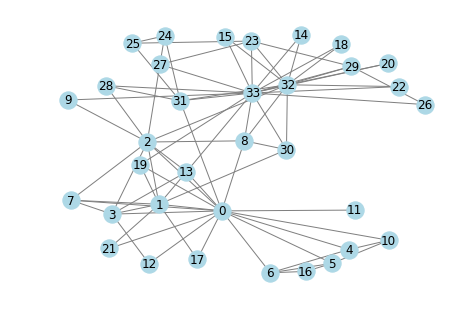

In [2]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

Networkx stores the degrees of nodes in a dictionary where the keys are node IDs and the values are their associated degrees.
You can get access to that dictionary using the G dot degree method.  

In [3]:
G.degree()

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

Again, the keys in the dictionary are node IDs and the values are the corresponding degrees of the nodes. So for example, node 31 has six friends or six ties. Node number 30 has four, and so on.  
  
We can use this dictionary to find the degree of a given node. Or alternatively, we can use to G dot degree function.

In [7]:
G.degree()[33]  # G dot degree gives us the dictionary which is accessed by keys. So we can see from the above that we have a node called 33.

17

In [6]:
G.degree(33)   # Alternatively, we can use the G dot degree method.  And in this case, the argument is the node whose degree we would like to find out.

17

#### Graph Visualization: Question 1
How many nodes and edges are included in the karate club network (as described in Video 4.3.3)?  
- 14 nodes, 28 edges
- 33 nodes, 28 edges
- 33 nodes, 70 edges
- 34 nodes, 78 edges
  
ANSWER: 34 nodes, 78 edges  

#### Graph Visualization: Question 2
What does G.degree(0) is G.degree()[0] return?    
ANSWER: True  
  
#### Graph Visualization: Question 3
Which function in networkx (imported as nx) plots a network?  
- nx.plot
- nx.draw
- nx.graph
- nx.Graph
  
ANSWER: nx.draw

In [15]:
G.degree(0) is G.degree()[0]

True

### Random Graphs
- Learn how to write a function to build an Erdős-Rényi graph  
  
In the same way that we can generate random numbers from a given distribution, like the normal or the binomial distribution,
we can sample not numbers but random graphs from a collection or ensemble of random graphs. Just like different distributions of numbers give rise to different samples of numbers, different random graph models give rise to different kinds of random graphs.    
The simplest possible random graph model is the so-called Erdos-Renyi, also known as the ER graph model.   
   
This family of random graphs has two parameters, capital N and lowercase p. Here the capital N is the number of nodes in the graph, and p is the probability for any pair of nodes to be connected by an edge.  
  
Here's one way to think about it-- imagine starting with N nodes and no edges. You can then go through every possible pair of nodes and with probability p insert an edge between them. In other words, you're considering each pair of nodes once, independently of any other pair. You flip a coin to see if they're connected, and then you move on to the next pair. If the value of p is very small, typical graphs generated from the model tend to be sparse, meaning having few edges. In contrast, if the value of p is large, typical graphs tend to be densely connected.  
  
Although the NetworkX library includes an Erdos-Renyi graph generator, we'll be writing our own ER function to better understand the model. This is also an opportunity for us to learn more about the NetworkX library, and it's also a step towards being able to implement a more complicated network model yourself, the kind of model that is not included in the NetworkX library.  
  
Our task is to implement an ER model as a Python function. Let's first see how to implement the coin flip just one time. To do this, we'll be using the SciPy stats module, more specifically a function called Bernoulli.  
  

In [20]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)  # rvs method to generate one single realization. only input argument is p, which is the probability of success.  
# in this case, the outcomes are codes as 0s and 1s

1

In [21]:
bernoulli.rvs(p=0.2)

0

In [22]:
N=20
p=0.2
# Create empty graph
G = nx.Graph()

# add all N nodes in the graph
G.add_nodes_from(range(N))

# loop over all pairs of nodes 
for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(node1, node2)
# add an edge with prob p

In [23]:
G.number_of_nodes()

20

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


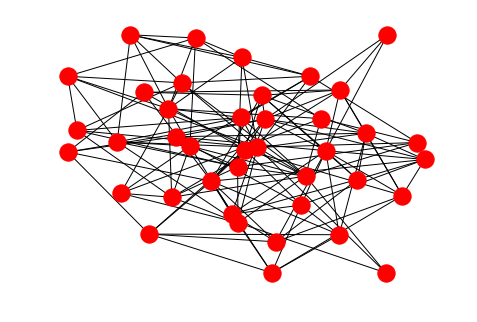

In [25]:
nx.draw(G)
plt.show()

In fact, we have a subtle error in our code. Now we're considering each pair of nodes twice, not just once, as we should. Consider running through the two loops, one nested inside the other. Consider a situation where node 1 is equal to 1 and node 2 is equal to 10. In this case, we're considering the pair 1,10. Now if you move forward in that loop, there's  going to be a moment where node 1 is equal to 10, and node 2 is equal to 1. In this case, we are considering the node pair 10,1. But because our graph is undirected, we should consider each pair of nodes just one time.  
  
For this reason, we need to impose an extra constraint such as node 1 less than node 2 or node 1 greater than node 2. Either additional constraint will force us to consider each pair of nodes just one time.  

In [26]:
N=20
p=0.2
# Create empty graph
G = nx.Graph()

# add all N nodes in the graph
G.add_nodes_from(range(N))

# loop over all pairs of nodes 
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2)
# add an edge with prob p

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


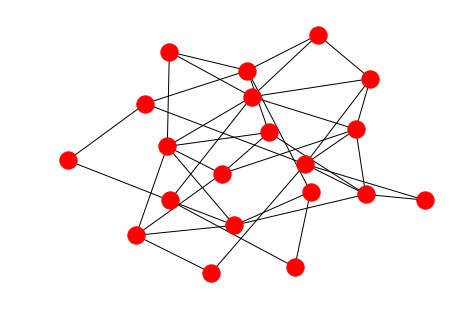

In [27]:
nx.draw(G)
plt.show()

In [4]:
def er_graph(N,p):
    """Generate an ER graph."""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G
    

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


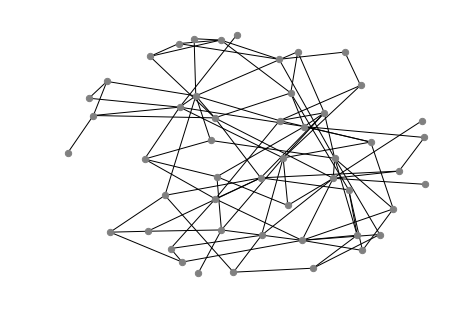

In [30]:
nx.draw(er_graph(50,0.08), node_size=40, node_color="gray")
plt.show()

In [ ]:
nx.draw(er_graph(50,0.08), node_size=40, node_color="gray")
plt.show()

In [48]:
N=10
p=0
# Create empty graph
G = nx.Graph()

# add all N nodes in the graph
G.add_nodes_from(range(N))

# loop over all pairs of nodes 
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2)
# add an edge with prob p

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


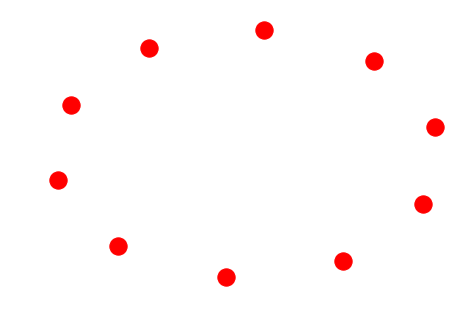

In [49]:
plt.clf()
nx.draw(G)
plt.show()

#### Random Graphs: Question 1
How many components do you expect in an Erdős-Rényi graph with n=10 and p=1?
- 0
- 1
- 10
- Because it's a random graph, it depends on the given realization.
  
ANSWER: 1  
Explanation: p=1 means an edge exists between each node pair, making the network consist of one component.  
  
#### Random Graphs: Question 2
How many components do you expect in an Erdős-Rényi graph with n=10 and p=0?
- 0
- 1
- 10
- Because it's a random graph, it depends on the given realization.
  
ANSWER: 10
Explanation : p=0 means the network will contain no edges, so each node is also its own component.

### Plotting the Degree Distribution
G.degree() returns a dictionary  
G.degree().values returns the degree of the different nodes  
list(G.degree().values())  returns a list  
  
Degree $K$ (k will get rendered as LaTeX k letter)  


In [1]:
def plot_degree_distribution(G):
    plt.hist(list(G.degree().values()), histtype="step")
    plt.xlabel("Degree $K$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

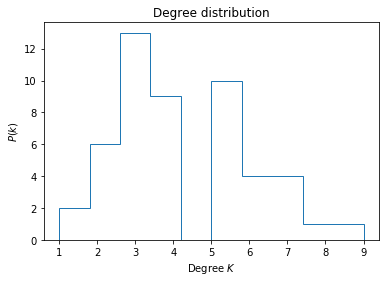

In [12]:
import networkx as nx
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
G = er_graph(50, 0.08)     # 50 nodes and probability is 0.08
plot_degree_distribution(G)

plt.show()

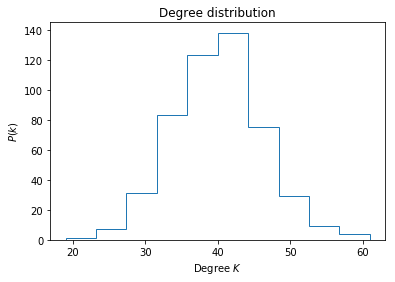

In [14]:
# increase the nodes
G = er_graph(500, 0.08)     # 500 nodes and probability is 0.08
plot_degree_distribution(G)
plt.show()

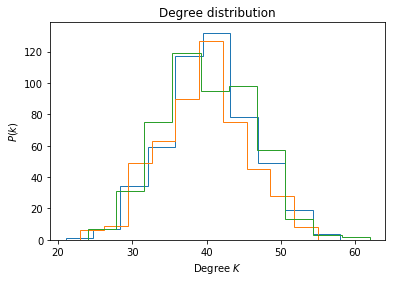

In [15]:
G1 = er_graph(500, 0.08)    
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)    
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)    
plot_degree_distribution(G3)
plt.show()

In this case, we have three plots, three histograms, because we have three different graphs.
Because every graph realization will be different from any other, that means that the specific degree distribution of any graph is going to be somewhat different from that of any other graph. In this case, we can see that the three degree distributions follow one another fairly closely. This is an example of degrees distributions drawn from three different Erdos-Renyi graphs.

#### Plotting the Degree Distribution: Question 1
Consider the following code:  
D={1:1, 2:2, 3:3}  
plt.hist(D)  
What will this plot?  
- A flat histogram with bins at 1, 2, and 3.  
- A histogram with with bins of increasing height at 1, 2, and 3.
- This code contains an error.  
  
ANSWER: This code contains an error  
EXPLANATION : plt.hist does not take dictionaries a single argument.

#### Plotting the Degree Distribution: Question 2
How do the degree distributions in   
nx.erdos_renyi_graph(100, 0.03) and   
nx.erdos_renyi_graph(100, 0.30) compare?
- The latter distribution has a greater mean on average.
- The former distribution has a greater mean on average.
- he means are approximately the same.
  
ANSWER: The latter distribution has a greater mean on average.   

### Descriptive Statistics of Empirical Social Networks
- Look at the basic properties of social networks in two villages in rural India
- Compare the degree distribution of these empirical networks with the degree distribution of the ER networks  
  
In this task, we will look at basic properties of the social networks from two different villages in rural India. These data are part of a much larger dataset that was collected to study diffusion of micro-finance. And the findings of this study were published in an article called, "The Diffusion of Micro-finance," in the Journal Science in 2013.  
    
In short, a census of households was conducted, and a subset of individuals was asked detailed questions about the relationships they have with others in the village. This information was used to create networks for each village. Basic information for all households and all surveyed individuals
was also collected.  
  
The structure of connections in a network can be captured in what is known as the Adjacency matrix of the network.  
  
If we have n nodes, this is n by n matrix, where entry ij is one if node i and node j have a tie between them. Otherwise, that entry is equal to zero.  
    
The graphs we're dealing with are called undirected, which means that a tie between nodes i and j
can just as well be described as a tie between nodes j and i.  
  
Consequently, the adjacency matrix is symmetric. That means that the element ij is always the same as the element ji.  
  
Either both are zero or both are equal to 1.  
  
We provide the adjacency matrix files for the two villages as CSV files. We will first read in the network of adjacency matrices and construct the networks. Here, np.loadtxt is used to read in the CSV files, the adjacency matrices.  
  

In [22]:
import os
os.chdir('D:/Dev/Python/PythonForResearch/videos/4/3 SocialNetwork/datasets/Data/1. Network Data/Adjacency Matrices')
import numpy as np
A1 = np.loadtxt('adj_allVillageRelationships_vilno_1.csv', delimiter=",")
A2 = np.loadtxt('adj_allVillageRelationships_vilno_2.csv', delimiter=",")

# Our next step will be to convert the adjacency matrices to graph objects. We will accomplish that by 
# using the to NetworkX graph method.
import networkx as nx
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


Although networks can be quite complex, we can measure some of their properties using simple numbers.
To get a basic sense of the network size and number of connections, let's count the number of nodes and the number of edges in the networks. In addition, each node has a total number of edges, its degree.

In [23]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("number of edges: %d" % G.number_of_edges())
    print("Average degree: %.2f" % np.mean(list(G.degree().values())))
    

In [24]:
basic_net_stats(G1)

Number of nodes: 843
number of edges: 3405
Average degree: 8.08


In [25]:
basic_net_stats(G2)

Number of nodes: 877
number of edges: 3063
Average degree: 6.99


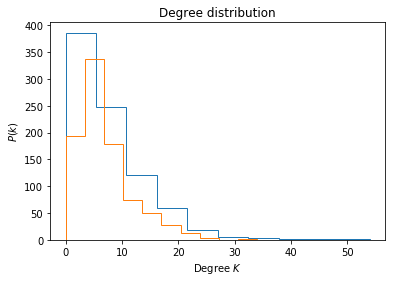

In [26]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.show()

we observed for the ER networks. It seems that most people have relatively few connections,
whereas a small fraction of people have a large number of connections. This distribution doesn't look at all symmetric, and its tail extends quite far to the right. This suggests that the ER graphs are likely not good models for real world social networks. In practice, we can use ER graphs as a kind of reference graph by comparing their properties to those of empirical social networks.  
  
More sophisticated network models are able to capture many of the properties that are shown by real world networks.  
But we will not go into those details here.

#### Descriptive Statistics: Question 1
As described in Video 4.3.6, which network has more nodes?  
- G1
- G2
  
ANSWER: G2

#### Descriptive Statistics: Question 2
As described in Video 4.3.6, which network has more edges?  
- G1
- G2
  
ANSWER: G1

### Finding the Largest Connected Component
- Learn how to find the largest connected component in a network
- Learn how to visualize the largest connected component
  
In most networks, most nodes are connected to each other as part of a single connected component.
That is for each pair of nodes in this component, there exists a set of edges that create a path between them. Let's now find out how large the largest connected component is in our two graphs.  
  
We can extract all components for graph using the following function

In [27]:
nx.connected_component_subgraphs(G1)

<generator object connected_component_subgraphs at 0x000001AB724A5200>

Generator functions do not return a single objectbut instead, they can be used to generate a sequence of objects using the next method.

In [28]:
gen = nx.connected_component_subgraphs(G1)

In [29]:
g = gen.__next__()

In [30]:
type(g)

networkx.classes.graph.Graph

In [32]:
g.number_of_nodes()

825

In [33]:
len(gen.__next__())

3

And what Python is telling us is that the next subsequent component has three nodes in it.  
  
And we could, in principle, run these a few times until we run out of components.  


Let's take another moment to look at the code. The first thing to realize here is that len when apply to a graph object returns to the number of nodes in that object.

In [35]:
len(G1)

843

In [36]:
G1.number_of_nodes()

843

When we're running the line length of generator next, Python is going over the graph one component at a time. So for example, in this case, we might have five components or as many as 25 components in our graphs. Each of these components has some size associated with it, which again is the number of nodes
that make up that given component. 

In [37]:
len(gen.__next__())

3

In [38]:
len(gen.__next__())

4

len(gen.__next__())  
  
We can keep running this and until eventually we'll have run out of components. One thing to realize about this is that the ordering of these components is arbitrary. If this looks tedious, that's because it is. In practice, we wouldn't call the next method manually in this way.    
  
Instead, we would use some other function that will implicitly call the next method. A good way to proceed is to use the max function that we can use to get the maximum of a sequence. The max function can take in a generator as its input.    
  
But given to graph components, A and B, how can the max function possibly know which is the maximum?
And what does maximum even mean in this context? The answer is that we need to tell the max function what number to associate with each object in the sequence, in this case, a graph. The size of a component is defined as the number of nodes it contains, which as we saw above, we can obtain by applying the len function to a given component.

In [39]:
gen = nx.connected_component_subgraphs(G1)

# LCC - Largest connected component
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

In [40]:
len(G1_LCC)

825

In [41]:
G1_LCC.number_of_nodes()

825

In [42]:
len(G2_LCC)

810

In [44]:
G1_LCC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

And in this case, we see that 97.9% of all of the nodes of graph G1 are contained in the largest connected component.

In [45]:
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

In practice, it is very common for networks to contain one component that encompasses
a large majority of its nodes, 95, 99, or even 99.9% of all of the nodes.

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


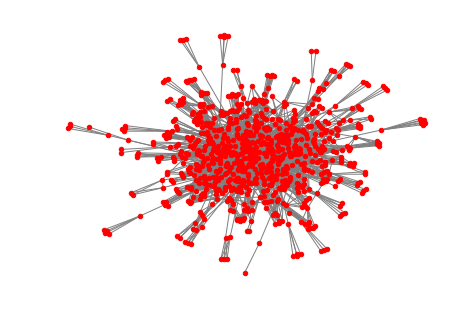

In [46]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.show()

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


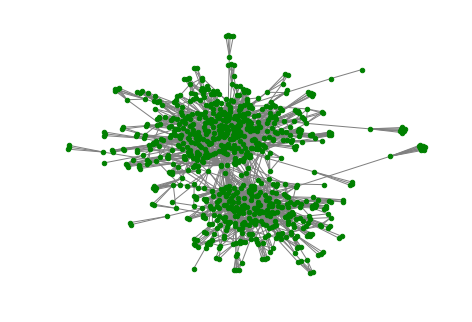

In [47]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)
plt.show()

The visualization algorithm that we have used is stochastic, meaning that if you run it several times,
you will always get a somewhat different graph layout.  
However, in most visualizations, you should find that the largest connected component of G2 appears to consist of two separate groups.   
These groups are called network communities. And the idea is that a community is a group of nodes that are densely connected to other nodes in the group, but only sparsely connected nodes outside of that group.  

#### Finding the Largest Connected Component: Question 1
For an iterator object X, what does X.__next__() do?  
- Returns the next value in X, if it exists
- Returns the next iterator, if it exists
- Moves on to the next line of code
- This code contains an error
  
ANSWER: Returns the next value in X, if it exists

#### Finding the Largest Connected Component: Question 2
For a given network G, what does len(G) return?  
- The length of the longest path
- The size of the largest component
- The number of nodes
- The number of edges
- A list of nodes in each component
  
ANSWER: The number of nodes

#### Finding the Largest Connected Component: Question 3
Graphs G1 and G2 are defined as in Video 4.3.7.  
- G1
- G2
  
ANSWER: G1

#### Finding the Largest Connected Component: Question 4
Graphs G1 and G2 are defined as in Video 4.3.7.  
  
Which graph contains the greatest fraction of its nodes in its largest connected component?
- G1
- G2
  
ANSWER: G1

## Case Study 6
### Exercise 1
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.
- individual_characteristics.dta contains several characteristics for each individual in the dataset such as age, religion, and caste. Use the pandas library to read in and store these characteristics as a dataframe called df.
- Store separate datasets for individuals belonging to Villages 1 and 2 as df1 and df2, respectively. (Note that some attributes may be missing for some individuals. Here, investigate only those pairs of nodes where the attributes are known for both nodes. This means that we're effectively assuming that the data are missing completely at random.)
- Use the head method to display the first few entries of df1.

In [48]:
import pandas as pd
data_filepath = "https://s3.amazonaws.com/assets.datacamp.com/production/course_974/datasets/"
df  = pd.read_stata(data_filepath + "individual_characteristics.dta")

In [49]:
df1 = df[(df.village == 1)]
df2 = df[(df.village == 2)]

In [50]:
df1.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


### Exercise 2
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
  
- In this dataset, each individual has a personal ID, or PID, stored in key_vilno_1.csv and key_vilno_2.csv for villages 1 and 2, respectively. data_filepath contains the base URL to the datasets used in this exercise. Use pd.read_csv to read in and store key_vilno_1.csv and key_vilno_2.csv as pid1 and pid2 respectively. The csv files have no headers, so make sure to include the parameter header = None.

In [51]:
pid1 = pd.read_csv(data_filepath + 'key_vilno_1.csv', dtype=int, header = None)
pid2 = pd.read_csv(data_filepath + 'key_vilno_2.csv', dtype=int, header = None)

### Exercise 3
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
- Define Python dictionaries with personal IDs as keys and a given covariate for that individual as values. Complete this for the sex, caste, and religion covariates, for Villages 1 and 2. Store these into variables named sex1, caste1, and religion1 for Village 1 and sex2, caste2, and religion2 for Village 2.

In [54]:
sex1      = df1.set_index("pid")["resp_gend"].to_dict()
caste1    = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

sex2      = df2.set_index("pid")["resp_gend"].to_dict()
caste2    = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()

### Exercise 4
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
- Let's consider how much homophily exists in these networks. For a given characteristic, our measure of homophily will be the proportion of edges in the network whose constituent nodes share that characteristic. How much homophily do we expect by chance? If characteristics are distributed completely randomly, the probability that two nodes x and y share characteristic a is the probability both nodes have characteristic a, which is the frequency of a squared. The total probability that nodes x and y share their characteristic is therefore the sum of the frequency of each characteristic in the network. For example, in the dictionary favorite_colors provided, the frequency of red and blue is 1/3 and 2/3 respectively, so the chance homophily is (1/3)^2+(2/3)^2 = 5/9. Create a function chance_homophily(chars) that takes a dictionary with personal IDs as keys and characteristics as values, and computes the chance homophily for that characteristic.
- A sample of three peoples' favorite colors is given in favorite_colors. Use your function to compute the chance homophily in this group, and store as color_homophily.
- Print color_homophily.

In [56]:
from collections import Counter
import numpy as np
def chance_homophily(chars):
    """
    Computes the chance homophily of a characteristic,
    specified as a dictionary, chars.
    """
    chars_counts_dict = Counter(chars.values())
    chars_counts = np.array(list(chars_counts_dict.values()))
    chars_props  = chars_counts / sum(chars_counts)
    return sum(chars_props**2)

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.555555555556


### Exercise 5
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
- sex1, caste1, religion1, sex2, caste2, and religion2 are already defined from previous exercises. Use chance_homophily to compute the chance homophily for sex, caste, and religion In Villages 1 and 2. Is the chance homophily for any attribute very high for either village?

In [57]:
print("Village 1 chance of same sex:", chance_homophily(sex1))
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))

print("Village 1 chance of same sex:", chance_homophily(sex2))
print("Village 1 chance of same caste:", chance_homophily(caste2))
print("Village 1 chance of same religion:", chance_homophily(religion2))

Village 1 chance of same sex: 0.502729986168
Village 1 chance of same caste: 0.674148850979
Village 1 chance of same religion: 0.980489698852
Village 1 chance of same sex: 0.500594530321
Village 1 chance of same caste: 0.425368244801
Village 1 chance of same religion: 1.0


### Exercise 6
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
- Now let's compute the observed homophily in our network. Recall that our measure of homophily is the proportion of edges whose nodes share a characteristic. homophily(G, chars, IDs) takes a network G, a dictionary of characteristics chars, and node IDs IDs. For each node pair, determine whether a tie exists between them, as well as whether they share a characteristic. The total count of these is num_same_ties and num_ties respectively, and their ratio is the homophily of chars in G. Complete the function by choosing where to increment num_same_ties and num_ties.

In [63]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties, num_ties = 0, 0
    for n1 in G.nodes():
        for n2 in G.nodes():
            if n1 > n2:   # do not double-count edges!
                if IDs[n1] in chars and IDs[n2] in chars:
                    if G.has_edge(n1, n2):
                        num_ties += 1
                        if chars[IDs[n1]] == chars[IDs[n2]]:
                            num_same_ties += 1
    return (num_same_ties / num_ties)

### Exercise 7
Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.  
- The networks for Villages 1 and 2 have been stored as networkx graph objects G1 and G2. Use your homophily function to compute the observed homophily for sex, caste, and religion in Villages 1 and 2.
- Print all six values. Are these values higher or lower than that expected by chance?

In [64]:
import networkx as nx
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [65]:
print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))
print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))


print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))
print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))

KeyError: 1